In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://drive.google.com/file/d/1VD06DjyGegNAWdJxFqKW-BtNsSbZsbez/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
ad = pd.read_csv(url)

In [3]:
ad.head()
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<h1><mark>RELATION BETWEEN SPENT ON ADS & SALES</mark></h1>

<h3>Sum up all the advertisement spent into one column</h3>

In [4]:
ad['total_spent'] = ad.loc[:, 'TV':'newspaper'].sum(axis=1)
ad.head()

,TV,radio,newspaper,sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<h3>Line of Regression using SeaBorn</h3>

<Axes: xlabel='total_spent', ylabel='sales'>

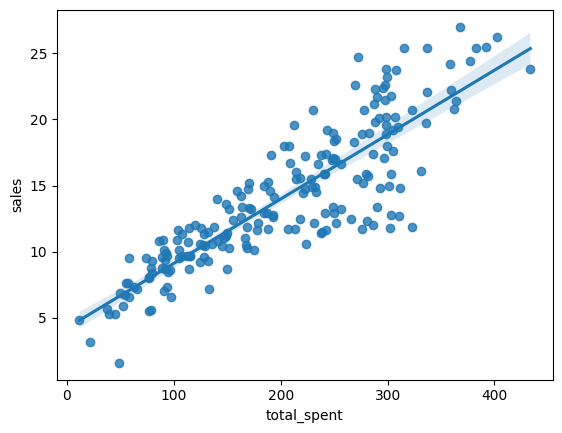

In [5]:
sns.regplot(data=ad , x='total_spent' , y="sales") # line of bestFit(Linear Regression line)

In [2]:
# Create a scatter plot with a regression line showing the relationship between 'total_spent' and 'sales' using seaborn library
sns.regplot(data=ad, x='total_spent', y="sales") 

NameError: name 'sns' is not defined

In [6]:
X = ad['total_spent'] # feature
Y = ad["sales"] # label

<h2><mark>Calculation the solution of beta function for linear Regression</mark></h2>
<h3>y = B1X + B0</h3>

In [18]:
# y = mx + b
# y = B1X + B0
linear = np.polyfit(X,Y,deg=1) # linear equation

In [16]:
potential_spent = np.linspace(0,500,180)

In [9]:
predict_sales = linear[0]*potential_spent + linear[1]

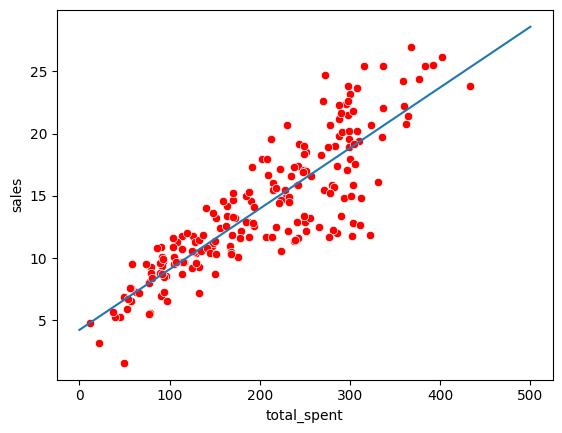

In [10]:
sns.scatterplot(data=ad , x="total_spent" , y="sales" , color='red')
plt.plot(potential_spent , predict_sales)

<h2><mark>Calculation the solution of beta function for Ploynomial Regression</marK></h2>
<h3>y = B3*x^3 + B2*x^2 + B1*x + B0y</h3>

In [11]:
poly = np.polyfit(X,Y,deg=3)

In [12]:
predict_sales_poly = poly[0]*(potential_spent**3) + poly[1]*(potential_spent**2) + poly[2]*(potential_spent) + poly[3]

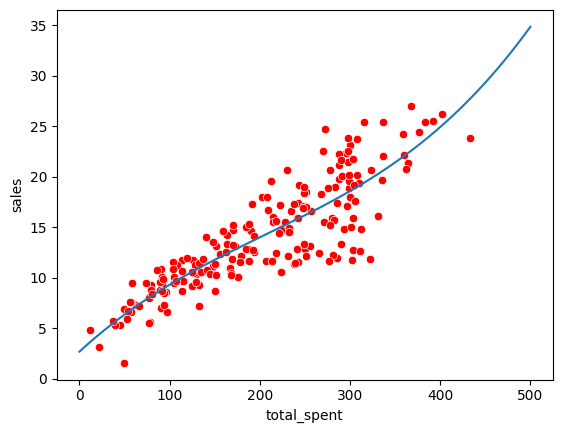

In [13]:
sns.scatterplot(data=ad , x="total_spent" , y="sales" , color='red')
plt.plot(potential_spent , predict_sales_poly)

<h3><mark>ERROR CALCULATION</mark></h3>

In [14]:
error_linear = (predict_sales - ad["sales"][0:len(predict_sales)])**2
np.mean(error_linear)

86.59718407637754

In [15]:
error_poly = (predict_sales_poly - ad["sales"][0:len(predict_sales)])**2
np.mean(error_poly)

109.6357513824663